In [1]:
import pandas as pd

In [2]:
DS = pd.read_excel('/content/DTP_Natasha_Stanza_Pullenti_Spacy_str.xlsx', index_col=0)
DS

,Source,Datetime,Text,Text_address,Nat_NER,Nat_addr,Stanza,Pullenti,Spacy
0,ДТП и ЧП МОСКВА и МО,[01.02.2024 11:05],"Москва, ул.Подольских Курсантов 4 Сгорел авт...",Москва ул. Подольских Курсантов 4,Москва Курсантов,Москва Подольских Курсантов улица,Москва ул.Подольских Курсантов 4 Сгорел,город МОСКВА улица ПОДОЛЬСКИХ КУРСАНТОВ дом 4,Москва Подольских Курсантов
1,ДТП и ЧП МОСКВА и МО,[01.02.2024 12:51],"Подмосковье, Между Рузой и Можайском",Подмосковье Рузой Можайском,Подмосковье Между Рузой Можайском,NaN,Подмосковье Между Рузой Можайском,область МОСКОВСКАЯ,Подмосковье Между Рузой
2,ДТП и ЧП МОСКВА и МО,[01.02.2024 13:36],"Подмосковье, Дмитровский г.о. Трасса А107, д...",Подмосковье Дмитровский г.о. Трасса А107 де...,Подмосковье Дмитровский Кузяево,Кузяево деревня,Подмосковье Дмитровский А107 Кузяево,область МОСКОВСКАЯ,Подмосковье Дмитровский г.о. Кузяево
3,ДТП и ЧП МОСКВА и МО,[01.02.2024 14:14],"Москва, ЖК «Загорье» Лифт с девушкой сорвалс...",Москва ЖК «Загорье»,Москва ЖК,Москва,Москва ЖК «Загорье» Лифт,город МОСКВА жилой комплекс ЗАГОРЬЕ ЛИФТ,Москва
4,ДТП и ЧП МОСКВА и МО,[01.02.2024 15:43],"Москва, Ленинский проспект 158 Сгорел автомо...",Москва Ленинский проспект 158,Москва Ленинский проспект,Москва Ленинский проспект,Москва Ленинский проспект 158 Сгорел,город МОСКВА проспект ЛЕНИНСКИЙ дом 158,Москва Ленинский проспект
...,...,...,...,...,...,...,...,...,...
1197,Брянск /новости/ ЧП/ДТП,[16.03.2024 22:32],"В Брянске засыпали громадную яму, в которую ...",Брянске,Брянске,Брянске,Брянске,город БРЯНСК,Брянске
1198,Брянск /новости/ ЧП/ДТП,[17.03.2024 14:26],Под Клинцами водитель иномарки насмерть сбил...,Клинцами,Клинцами,NaN,Клинцами,NaN,Клинцами
1199,Брянск /новости/ ЧП/ДТП,[18.03.2024 12:05],В Любохне 48-летний мужчина погиб в ДТП Серь...,Любохне поселке Любохна Дятьковского района ул...,Любохне Любохна Дятьковского района Орловской,Любохна посёлок Дятьковского район Орловс...,Любохне Любохна Дятьковского района улице Орло...,район ДЯТЬКОВСКИЙ поселок ЛЮБОХНА улица ОРЛОВСКАЯ,Любохне Любохна Дятьковского района Орловской
1200,Брянск /новости/ ЧП/ДТП,[18.03.2024 12:33],??Сегодня ночью в Суражском районе произошёл...,Суражском районе Суражский район с. Высокосел...,Суражском районе Суражский район,Суражском район Суражский район Высокосел...,Суражском районе Суражский район Высокоселище ...,район СУРАЖСКИЙ,Суражском районе Суражский район Высокоселище ...


In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
import sacrebleu

def bleu_on_test(dataset_test):
    n = 0
    translated = []
    target = []
    for i in DS['Text_address']:
        translated.append(DS.loc[n, dataset_test])
        target.append([i])
        n+=1
    bleu = sacrebleu.corpus_bleu(translated, target)
    return bleu

In [ ]:
bleu_on_test('Nat_NER')

BLEU = 0.00 100.0/50.0/0.0/0.0 (BP = 1.000 ratio = 1.000 hyp_len = 2 ref_len = 2)

In [ ]:
bleu_on_test('Nat_addr')

BLEU = 37.99 100.0/33.3/25.0/25.0 (BP = 1.000 ratio = 1.000 hyp_len = 4 ref_len = 4)

In [ ]:
bleu_on_test('Stanza')

BLEU = 80.91 85.7/83.3/80.0/75.0 (BP = 1.000 ratio = 1.000 hyp_len = 7 ref_len = 7)

In [ ]:
bleu_on_test('Pullenti')

BLEU = 8.64 42.9/8.3/5.0/3.1 (BP = 1.000 ratio = 1.000 hyp_len = 7 ref_len = 7)

In [ ]:
bleu_on_test('Spacy')

BLEU = 0.00 100.0/50.0/50.0/0.0 (BP = 1.000 ratio = 1.000 hyp_len = 3 ref_len = 3)

In [ ]:
sacrebleu.corpus_bleu(['Подмосковье Между Рузой'], [['  Подмосковье  Рузой Можайском']])

BLEU = 0.00 66.7/25.0/25.0/0.0 (BP = 1.000 ratio = 1.000 hyp_len = 3 ref_len = 3)

In [3]:
!pip install bert_score
from bert_score import score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

In [4]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [26]:
import numpy as np

In [5]:
from evaluate import load
bertscore = load("bertscore")

def bert_on_test(dataset_test):
    n = 0
    cands = []
    refs = []
    for i in DS['Text_address']:
        cands.append(DS.loc[n, dataset_test])
        refs.append(i)
        n+=1
    P, R, F1 = bertscore.compute(predictions=cands, references=refs, lang='ru')
    return P.mean(), R.mean(), F1.mean()


In [27]:
def bert_on_test(dataset_test):
    n = 0
    cands = []
    refs = []
    for i in DS['Text_address']:
        cands.append(DS.loc[n, dataset_test])
        refs.append(i)
        n+=1
    results = bertscore.compute(predictions=cands, references=refs, lang='ru')
    #print(results['precision'], results['recall'], results['f1'])
    return np.mean(results['precision']), np.mean(results['recall']), np.mean(results['f1'])


In [7]:
from evaluate import load
bertscore = load("bertscore")
predictions = ["hello world", "general kenobi"]
references = ["hello world", "general kenobi"]
results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
print(results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  # Means the user did not define a `HF_TOKEN` secret => warn


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

{'precision': [0.9999999403953552, 1.0], 'recall': [0.9999999403953552, 1.0], 'f1': [0.9999999403953552, 1.0], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.40.0)'}


In [35]:
metrics_NN = bert_on_test('Nat_NER')
print(f"Metrics for Natasha NER 'precision': {metrics_NN[0]}, 'recall': {metrics_NN[1]}, 'f1': {metrics_NN[2]}")

Metrics for Natasha NER 'precision': 0.8352615815926709, 'recall': 0.8191129624248543, 'f1': 0.8247685625330977


In [36]:
metrics_NA = bert_on_test('Nat_addr')
print(f"Metrics for Natasha Adress Extrator 'precision': {metrics_NA[0]}, 'recall': {metrics_NA[1]}, 'f1': {metrics_NA[2]}")

Metrics for Natasha Adress Extrator 'precision': 0.8140956469859537, 'recall': 0.7652273496702785, 'f1': 0.7874630571601792


In [37]:
metrics_ST = bert_on_test('Stanza')
print(f"Metrics for Stanza 'precision': {metrics_ST[0]}, 'recall': {metrics_ST[1]}, 'f1': {metrics_ST[2]}")

Metrics for Stanza 'precision': 0.8688985926041786, 'recall': 0.8629770460918224, 'f1': 0.8646528842841924


In [38]:
metrics_P =bert_on_test('Pullenti')
print(f"Metrics for Stanza 'precision': {metrics_P[0]}, 'recall': {metrics_P[1]}, 'f1': {metrics_P[2]}")

Metrics for Stanza 'precision': 0.6229004032798298, 'recall': 0.6664967421138545, 'f1': 0.6422545091929333


In [39]:
metrics_SP = bert_on_test('Spacy')
print(f"Metrics for Stanza 'precision': {metrics_SP[0]}, 'recall': {metrics_SP[1]}, 'f1': {metrics_SP[2]}")

Metrics for Stanza 'precision': 0.8545579561179569, 'recall': 0.8179568844210486, 'f1': 0.8344026008580568


In [57]:
df = pd.DataFrame([['Natasha NER']+list(metrics_NN), ['Natasha addr']+list(metrics_NA), ['Stanza']+list(metrics_ST), ['Pullenti']+list(metrics_P), ['Spacy']+list(metrics_SP)], columns=['Lib', 'precision', 'recall', 'f1'])

In [58]:
df

,Lib,precision,recall,f1
0,Natasha NER,0.835262,0.819113,0.824769
1,Natasha addr,0.814096,0.765227,0.787463
2,Stanza,0.868899,0.862977,0.864653
3,Pullenti,0.622900,0.666497,0.642255
4,Spacy,0.854558,0.817957,0.834403


<Axes: xlabel='Lib', ylabel='score'>

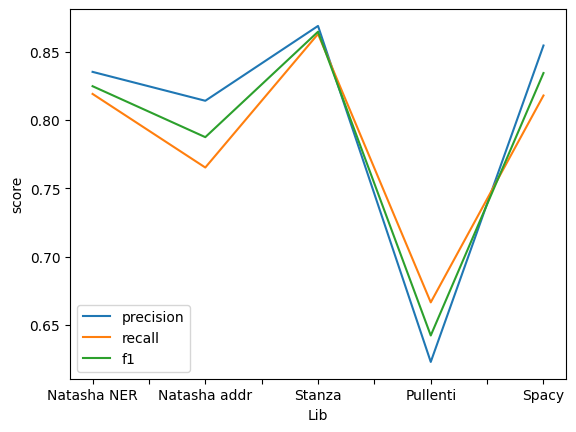

In [63]:
df.plot(kind='line', x='Lib', ylabel = 'score')